# Basketball Players

## Linear Regression in One Variable

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [194]:
"""
The following data (X1, X2, X3, X4, X5) are for each player.
X1 = height in feet
X2 = weight in pounds
X3 = percent of successful field goals (out of 100 attempted)
X4 = percent of successful free throws (out of 100 attempted)
X5 = average points scored per game
Reference: The official NBA basketball Encyclopedia, Villard Books
"""

df = pd.read_excel("mlr09.xls")

X = df.as_matrix()


*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [195]:
X

array([[6.80e+00, 2.25e+02, 4.42e-01, 6.72e-01, 9.20e+00],
       [6.30e+00, 1.80e+02, 4.35e-01, 7.97e-01, 1.17e+01],
       [6.40e+00, 1.90e+02, 4.56e-01, 7.61e-01, 1.58e+01],
       [6.20e+00, 1.80e+02, 4.16e-01, 6.51e-01, 8.60e+00],
       [6.90e+00, 2.05e+02, 4.49e-01, 9.00e-01, 2.32e+01],
       [6.40e+00, 2.25e+02, 4.31e-01, 7.80e-01, 2.74e+01],
       [6.30e+00, 1.85e+02, 4.87e-01, 7.71e-01, 9.30e+00],
       [6.80e+00, 2.35e+02, 4.69e-01, 7.50e-01, 1.60e+01],
       [6.90e+00, 2.35e+02, 4.35e-01, 8.18e-01, 4.70e+00],
       [6.70e+00, 2.10e+02, 4.80e-01, 8.25e-01, 1.25e+01],
       [6.90e+00, 2.45e+02, 5.16e-01, 6.32e-01, 2.01e+01],
       [6.90e+00, 2.45e+02, 4.93e-01, 7.57e-01, 9.10e+00],
       [6.30e+00, 1.85e+02, 3.74e-01, 7.09e-01, 8.10e+00],
       [6.10e+00, 1.85e+02, 4.24e-01, 7.82e-01, 8.60e+00],
       [6.20e+00, 1.80e+02, 4.41e-01, 7.75e-01, 2.03e+01],
       [6.80e+00, 2.20e+02, 5.03e-01, 8.80e-01, 2.50e+01],
       [6.50e+00, 1.94e+02, 5.03e-01, 8.33e-01, 1.92e+01

In [196]:
df.head()

,X1,X2,X3,X4,X5
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


# Check relationships between variables

<IPython.core.display.Javascript object>


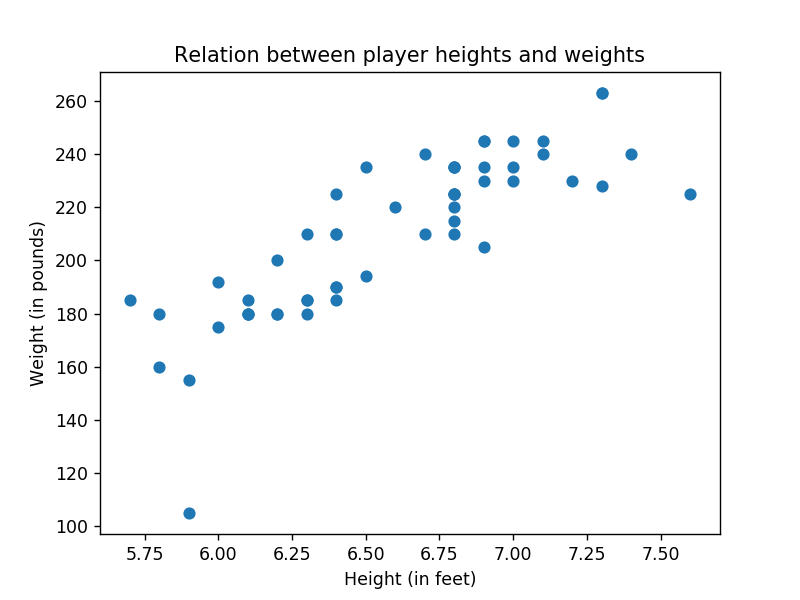

In [197]:
# Check the relation between height and weight of a basketball player
# Relation between X1 and X2
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Height (in feet)")
plt.ylabel("Weight (in pounds)")
plt.title("Relation between player heights and weights")
plt.show()

<IPython.core.display.Javascript object>


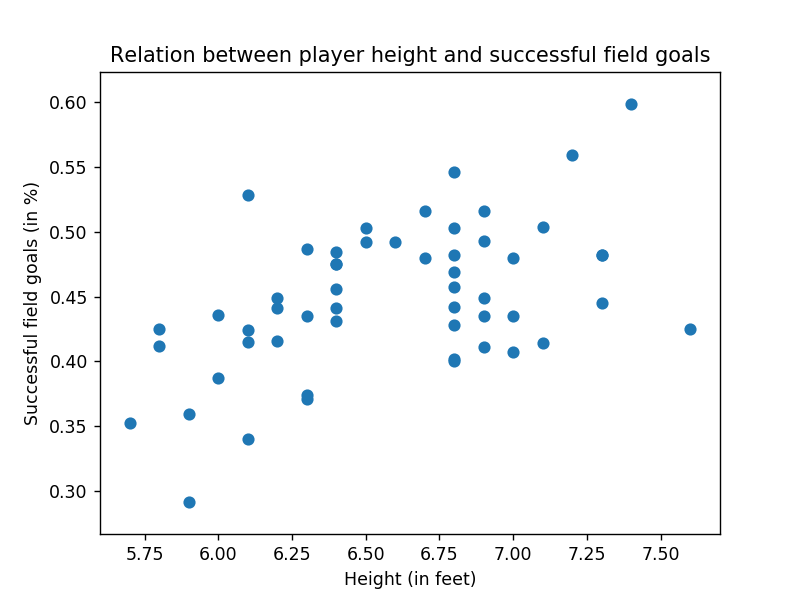

In [198]:
# Check the relation between the height of a player and the number of successful field goals
# Relation between X1 and X3
plt.figure()
plt.scatter(X[:,0],X[:,2])
plt.xlabel("Height (in feet)")
plt.ylabel("Successful field goals (in %)")
plt.title("Relation between player height and successful field goals")
plt.show()

<IPython.core.display.Javascript object>


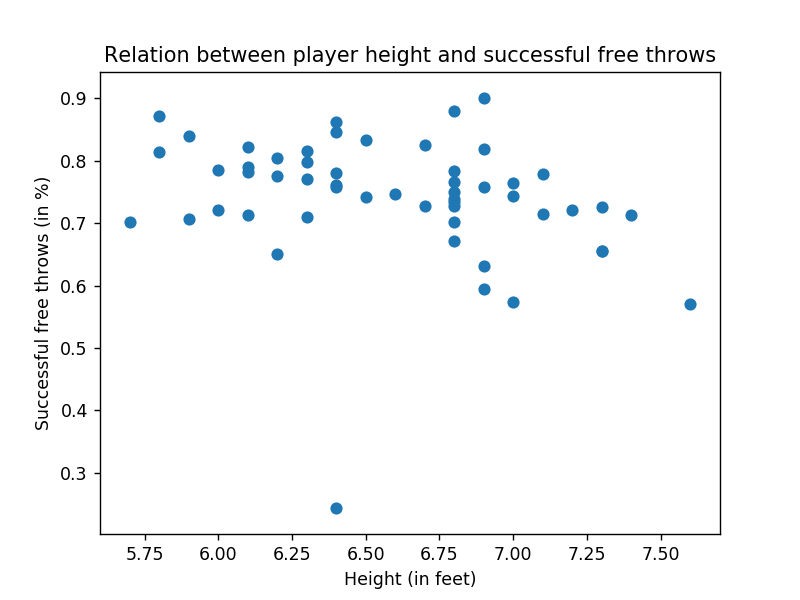

In [199]:
# Check the relation between the height of a player and the number of successful free throws
# Relation between X1 and X4
plt.figure()
plt.scatter(X[:,0],X[:,3])
plt.xlabel("Height (in feet)")
plt.ylabel("Successful free throws (in %)")
plt.title("Relation between player height and successful free throws")
plt.show()

<IPython.core.display.Javascript object>


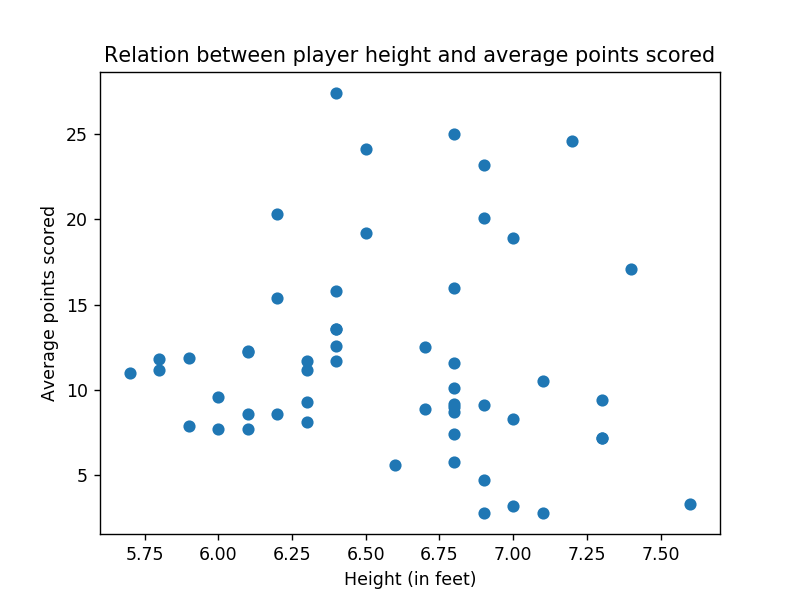

In [200]:
# Check the relation between the height of a player and the average points scored per game
# Relation between X1 and X5
plt.figure()
plt.scatter(X[:,0],X[:,4])
plt.xlabel("Height (in feet)")
plt.ylabel("Average points scored")
plt.title("Relation between player height and average points scored")
plt.show()

<IPython.core.display.Javascript object>


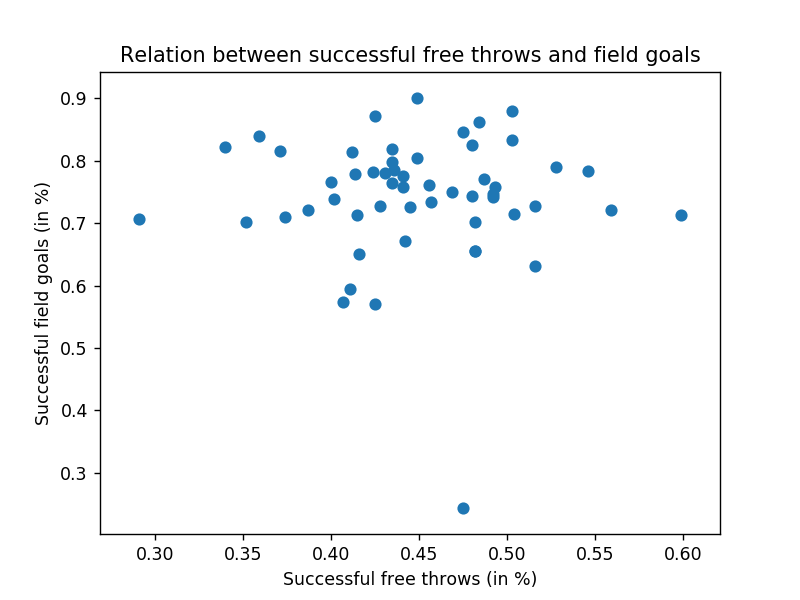

In [201]:
# Check the relation between successful field goals by a player and the successful free throws by a player
# Relation between X4 and X5
plt.figure()
plt.scatter(X[:,2],X[:,3])
plt.xlabel("Successful free throws (in %)")
plt.ylabel("Successful field goals (in %)")
plt.title("Relation between successful free throws and field goals")
plt.show()

<IPython.core.display.Javascript object>


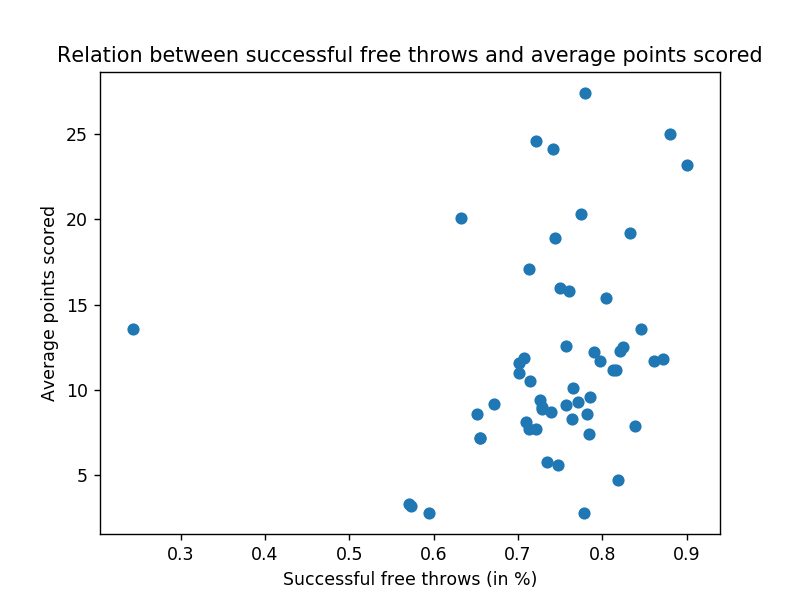

In [202]:
# Check the relation between successful free throws by a player and the average points scored per game
# Relation between X4 and X5
plt.figure()
plt.scatter(X[:,3],X[:,4])
plt.xlabel("Successful free throws (in %)")
plt.ylabel("Average points scored")
plt.title("Relation between successful free throws and average points scored")
plt.show()

From the few graphs plotted, certain factors are linearly dependent on each other e.g, height and weight, height and successful free throws, successful free throws and average points scored etc.

# Investigating which factor contributes the most to the average points scored by a player

In [203]:
df['Bias'] = 1
Y = df['X5']

# Let's see which factor plays a major role in player performance.
# Is it the player's physique (height and weight) or their skill (successful free throws and field goals)?

# Player Physique
X12 = df[['X1','X2','Bias']]

# Player Skill
X34 = df[['X3','X4','Bias']]

# Overall Player Profile
X_all = df[['X1','X2','X3','X4','Bias']]


In [204]:
def get_r2(X,Y):
    w = np.linalg.solve(X.T.dot(X),X.T.dot(Y))
    Yhat = X.dot(w)
    ss_res = Y - Yhat
    ss_total = Y - Y.mean()
    r2 = 1 - ss_res.dot(ss_res)/ss_total.dot(ss_total)
    return r2

In [205]:
print("r2 for x1 and x2 only = ",get_r2(X12,Y))
print("r2 for x3 and x4 only = ",get_r2(X34,Y))
print("r2 for x1, x2, x3 and x4 = ",get_r2(X_all,Y))

r2 for x1 and x2 only =  0.012218061132418856
r2 for x3 and x4 only =  0.17785286553073443
r2 for x1, x2, x3 and x4 =  0.222250631300147


It can be seen that a player's skill matters more than their physique

# Training a linear model to predict a player's weight from their height

In [206]:
train_test_split_ratio = 0.8

X = df.as_matrix()

train_indices = np.random.choice(len(X), round(len(X)*train_test_split_ratio), replace = False)
train_indices.sort()
test_indices = np.setdiff1d(np.arange(len(X)),train_indices)

In [207]:
train_indices

array([ 0,  2,  3,  4,  5,  6,  7,  9, 13, 15, 16, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 52, 53])

In [208]:
test_indices

array([ 1,  8, 10, 11, 12, 14, 17, 32, 36, 41, 51])

In [209]:
train = X[train_indices]
test = X[test_indices]

X_train = train[:,0]
Y_train = train[:,1]
X_test = test[:,0]
Y_test = test[:,1]


In [210]:
X_train

array([6.8, 6.4, 6.2, 6.9, 6.4, 6.3, 6.8, 6.7, 6.1, 6.8, 6.5, 6.3, 7.1,
       6.8, 7.3, 6.4, 6.8, 7.2, 6.4, 6.6, 6.8, 6.1, 6.5, 6.4, 6. , 7.3,
       6.1, 6.7, 5.8, 6.9, 7. , 7.3, 6.2, 6.8, 7. , 5.9, 6.1, 5.7, 7.1,
       5.8, 7.4, 6.8, 7. ])

<IPython.core.display.Javascript object>


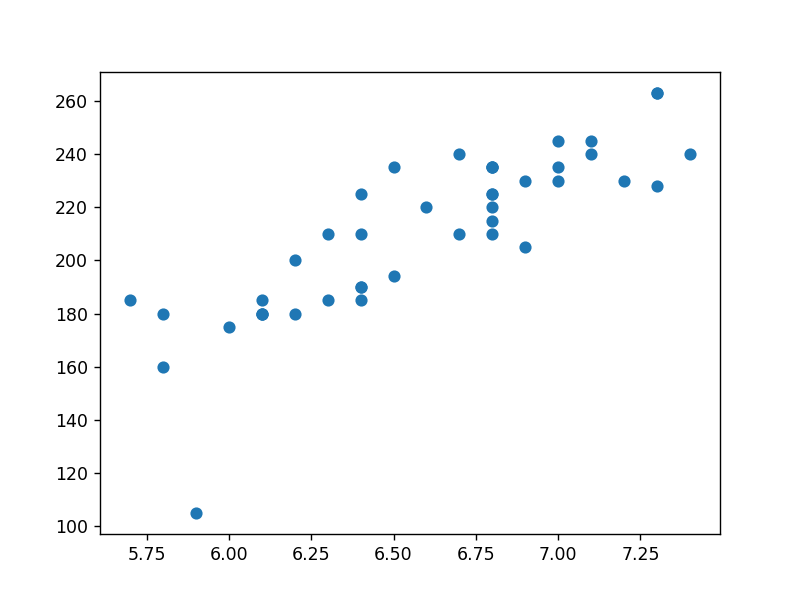

In [211]:
plt.figure()
plt.scatter(X_train,Y_train)
plt.show()

In [212]:
den = X_train.dot(X_train) - X_train.mean()*X_train.sum()
a = (X_train.dot(Y_train) - Y_train.mean()*X_train.sum())/den
b = (Y_train.mean()*X_train.dot(X_train) - X_train.mean()*X_train.dot(Y_train))/den

Yhat_train = a*X_train + b

In [213]:
a

56.80350404312778

In [214]:
b

-163.85566037736248

<IPython.core.display.Javascript object>


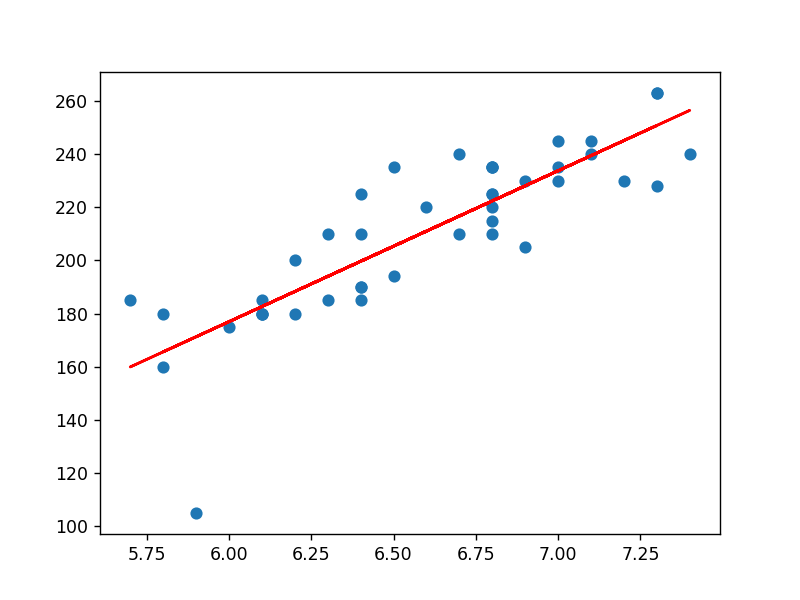

In [215]:
plt.figure()
plt.scatter(X_train,Y_train)
plt.plot(X_train,Yhat_train,'red')
plt.show()

In [216]:
ss_res = Y_train - Yhat_train
ss_total = Y_train - Y_train.mean()
train_r2 = 1 - ss_res.dot(ss_res)/ss_total.dot(ss_total)
print("r2 score for training data = ", train_r2)

r2 score for training data =  0.7096430834174663


<IPython.core.display.Javascript object>


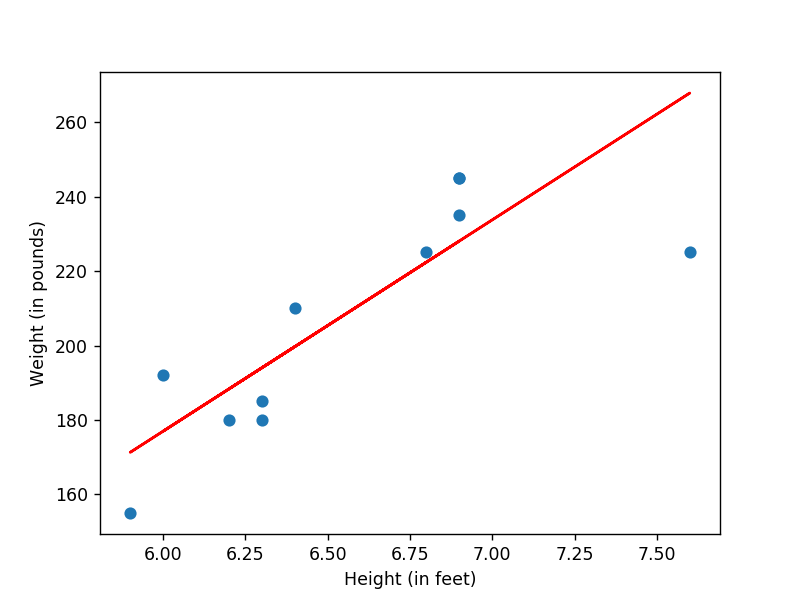

r2 score for testing data =  0.6296835206539786


In [217]:
Yhat_test = a*X_test + b

plt.figure()
plt.scatter(X_test,Y_test)
plt.plot(X_test,Yhat_test,'red')
plt.xlabel("Height (in feet)")
plt.ylabel("Weight (in pounds)")
plt.show()

ss_res1 = Y_test - Yhat_test
ss_total1 = Y_test - Y_test.mean()
test_r2 = 1 - ss_res1.dot(ss_res1)/ss_total1.dot(ss_total1)
print("r2 score for testing data = ", test_r2)

In [218]:
height = 5.9
weight = a*height  + b
weight = round(weight,2)
print("Per the model, a player of height {0} feet is predicted to have a weight of {1} pounds".format(height,weight))

Per the model, a player of height 5.9 feet is predicted to have a weight of 171.29 pounds
